# Объем гипершара

### Условие задачи

**Дано:**
- гипершар радиуса $1$ в пространстве $R^TotalDimensions, TotalDimensions=1..16$
- величины абсолютной и относительной погрешностей: $10^{-6}$, $10^{-6}$
- геометрический метод Монте-Карло

**Требуется:**
- указанным методом рассчитать объем гипершара в пространствах заданных размерностей
- в процессе расчета выводить время расчета для каждой размерности пространства
- оценить необходимое количество точек для достижения заданных погрешностей
- отобразить график объема гипершара в зависимости от размерности пространства (график 1)
- отобразить график количества точек в зависимости от размерности пространства (график 2)
- вывести разницу между полученным результатом и точными значениями (точные значения приведены на Рис. 1)
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения

<img src='https://upload.wikimedia.org/wikipedia/commons/6/6c/Hypersphere_volume_and_surface_area_graphs.svg' width=480></img>

<center>Рис. 1. График аналитической зависимости объема и площади поверхности гипершара от размерности пространства</center>

**Описание метода:**

Возьмем случайную равномерно распределенную выборку векторов $\xi_k^{(TotalDimensions)}, k \in [1, 2, ..., K]$ внутри куба $[0, 1]^TotalDimensions$.

Пусть $T \subset [1, 2, ..., K]$ - множество индексов векторов из выборки, лежащих внутри гипершара, т.е. $||\xi_i^{(TotalDimensions)}|| < 1, i \in T$.

Тогда оценкой объема гипершара будет $V_K^{(TotalDimensions)} \approx 2^TotalDimensions \cdot \frac{|T|}{K}$, где $|T|$ - количество элементов множества $T$.

Для оценки вероятностной погрешности воспользуемся следующим подходом:
- $\Delta V_K^{(TotalDimensions)} = |V_{K+\Delta K}^{(TotalDimensions)} - V_K^{(TotalDimensions)}|$
- $S = \varepsilon_a + |V_{K+\Delta K}^{(TotalDimensions)}| * \varepsilon_r$
- условие $|\Delta V_K^{(TotalDimensions)}| / S < 1.0$ означает, что удовлетворены абсолютная и относительная погрешности


**Материалы:**
- [TotalDimensions-sphere](https://en.wikipedia.org/wiki/TotalDimensions-sphere)
- [Метод Монте-Карло](https://ru.wikipedia.org/wiki/Метод_Монте-Карло)
- [Геометрический метод Монте-Карло](https://scask.ru/f_book_cmk.php?id=56)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества измерений `TotalDimensions`, баллов из 100:
```
    TotalDimensions   =    1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,   15,   16
    g(TotalDimensions) = 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.3, 1.6, 2.5, 4.5, 9.5, 21.5, 50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведено количество точек для каждой размерности - 20
    - не построен график 1 - 20
    - не построен график 2 - 20
    - отсутствует сравнение с точными значениями - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{TotalDimensions=1}^{16}{g(TotalDimensions)} - \sum_{i}{p(i)}$


In [1]:
import numpy
import time
import pandas
import matplotlib.pyplot as plt
from scipy.special import gamma
from numba import njit 

In [2]:
@njit(parallel=False, fastmath=True)
def CheckDifference(Difference, Dim, S):
    """ This function this means that the absolute and relative errors are satisfied
    :params: See the values of the variables in the function VolumeOfSphere
    :return: 0, 1, 2
    """
    if Difference == 0:
        if Dim == 1:
                return 1
        if Dim > 1:
                return 2
    if abs(Difference)/S < 1.0:
        return 1
    return 0

In [3]:
@njit(parallel=False, fastmath=True)
def CalculatePoints(ValueList, Dim):
    """ This function calculates the current point
    :param ValueList: this is InsideSphere, CountOfPoints, PreviousVolume, CalculatedVolume
    :param Dim: dimension, unsigned int
    :return: 0
    """
    for i in range(100000):
            ValueList[1] += 1  
            CurrentPoint = numpy.random.uniform(0, 1.0, Dim)  
            if numpy.linalg.norm(CurrentPoint) < 1.0:  
                ValueList[0] += 1
    return 0

In [4]:
@njit(parallel=False, fastmath=True)
def VolumeOfSphere(Dim, AbsIn, RelIn):
    """ This function calculates the volume of N-sphere
    :param Dim: dimension, unsigned int
    :param AbsIn: absolute inaccuracy, float
    :param RelIn: relative inaccuracy, float
    :return: tuple (CalculatedVolume, CountOfPoints)
     """
    ValueList = [0.0, 0.0, 0.0, 0.0] #InsideSphere, CountOfPoints, PreviousVolume, CalculatedVolume
    while True:
        CalculatePoints(ValueList, Dim)
        ValueList[3] = numpy.power(2.0, Dim) * (ValueList[0]/ValueList[1])
        Difference = abs(ValueList[3] - ValueList[2])
        S = AbsIn+RelIn*abs(ValueList[3])
        ValueList[2] = ValueList[3]
        Temp = CheckDifference(Difference, Dim, S)
        if Temp == 1:
            break
        else:
            if Temp == 2:
                continue
        if ValueList[1] >= 500000000:
            break
    return (ValueList[3], ValueList[1])


In [5]:
TotalDimensions = 16
AbsolteInaccuracy = 0.000001
RealtiveInaccuracy = 0.000001
Results = []
CurrentResult = ()
for i in range(0, TotalDimensions + 1):
    StartTime = time.time()
    CurrentResult = VolumeOfSphere(i, AbsolteInaccuracy, RealtiveInaccuracy)
    End = time.time()
    AnalysticVolume = numpy.pi ** (i * 0.5) / gamma(i * 0.5 + 1)
    Results.append([i, CurrentResult[0], AnalysticVolume, abs(CurrentResult[0]-AnalysticVolume), End - StartTime, CurrentResult[1]]) 
pandas.DataFrame(Results, columns=["TotalDimensions", "Volume", "Analytical volume", "Inaccuracy", "Time", "Count of points"]) 

,TotalDimensions,Volume,Analytical volume,Inaccuracy,Time,Count of points
0,0,1.000000,1.000000,0.000000,1.064746,200000.0
1,1,2.000000,2.000000,0.000000,0.056678,200000.0
2,2,3.142119,3.141593,0.000527,1.314848,4800000.0
3,3,4.188493,4.188790,0.000298,3.138468,10200000.0
4,4,4.935702,4.934802,0.000900,1.687872,5800000.0
5,5,5.267123,5.263789,0.003334,4.048530,13700000.0
6,6,5.169798,5.167713,0.002086,7.044195,23700000.0
7,7,4.734787,4.724766,0.010021,0.530159,1900000.0
8,8,4.078102,4.058712,0.019390,4.412346,11800000.0
9,9,3.301569,3.298509,0.003060,8.358815,26500000.0


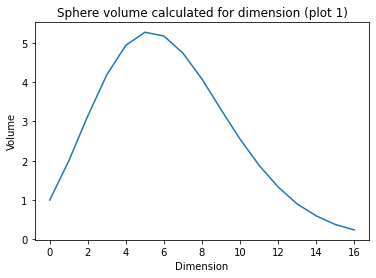

In [6]:
plt.plot(range(0, TotalDimensions+1), [x[1] for x in Results])
plt.title("Sphere volume calculated for dimension (plot 1)")
plt.xlabel("Dimension")
plt.ylabel("Volume")
plt.show() 

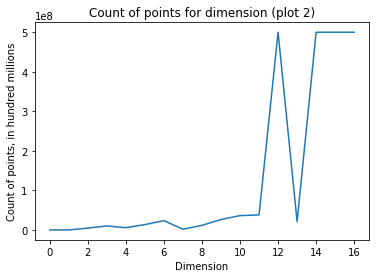

In [7]:
plt.plot(range(0, TotalDimensions+1), [x[-1] for x in Results])
plt.title("Count of points for dimension (plot 2)")
plt.xlabel("Dimension")
plt.ylabel("Count of points, in hundred millions")
plt.show()